In [47]:
import cdsapi

c = cdsapi.Client()

# c.retrieve(
#     'insitu-gridded-observations-global-and-regional',
#     {
#         'format': 'zip',
#         'origin': 'imerg',
#         'region': 'global',
#         'variable': 'precipitation',
#         'time_aggregation': 'daily',
#         'horizontal_aggregation': '0_2_x_0_2',
#         'year': [
#             '2013','2019', '2020',
#         ],
#         'version': 'v6.0',
#     },
#     'download.zip')

2022-11-05 15:50:50,977 INFO Welcome to the CDS
2022-11-05 15:50:50,978 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-global-and-regional
2022-11-05 15:50:51,233 INFO Request is queued
2022-11-05 15:50:52,432 INFO Request is running


KeyboardInterrupt: 

In [49]:
# c.retrieve("reanalysis-era5-pressure-levels",
# {
# "variable": "temperature",
# "pressure_level": "1000",
# "product_type": "reanalysis",
# "year": "2020",
# "format": "grib"
# }, "download.grib")

# Work with existing ERA data

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [4]:
basepath = '/Users/jukesliu/Documents/TURNER/DATA/WEATHER/ERA/'
os.listdir(basepath)

['ERA_2021_total_precip_values.csv',
 'ERA_2021_snowfall_values.csv',
 'ERA_2021_dates.csv',
 'ERA_2021_surface_runoff_values.csv',
 'ERA_2021_snow_depth_values.csv',
 'ERA_2021_snowmelt_values.csv',
 'adaptor.mars.internal-1654798688.7450771-22505-17-374721ba-2db0-47b1-8d42-8ad2777f05ad.nc']

# 2021 data & comparison with haenke temperatures

In [30]:
df1 = pd.read_csv(basepath+'ERA_2021_dates.csv',header=None, names=['dates'])
dates = pd.to_datetime(df1.dates, format='%d-%b-%Y %H:%M:%S')
len(dates)

8760

In [29]:
df2 = pd.read_csv(basepath+'ERA_2021_surface_runoff_values.csv',header=None, names=['runoff'])
ro = df2.runoff
len(ro)

8760

In [37]:
df3 = pd.read_csv(basepath+'ERA_2021_snowmelt_values.csv',header=None, names=['snowmelt'])
snowmelt = np.array(df3.snowmelt)
snowmelt = np.insert(snowmelt,0,0)
len(snowmelt)

8760

In [7]:
# compare with cumulative temperature
# add in weather data plot (daily_average):
def F_to_C(f_array):
    # converts array of temperatures in Farenheit to Celsuis
    f_array = np.array(f_array) # make sure it's a numpy array
    c_array = (f_array - 32)*5/9
    return c_array

weather_df = pd.read_csv('/Users/jukesliu/Documents/TURNER/DATA/WEATHER/wx_from_crrel_202209/wx_Haenke_2014_2022_nogap.csv')
weather_df.AKDT = pd.to_datetime(weather_df.AKDT) # convert to datetime
weather_df['Temp-AVG'] = F_to_C(weather_df['Temp-AVG'])
weather_df.head()

,GMT,Temp-AIR1,Temp-AIR2,Temp-AVG,AKDT
0,2013-01-01 00:00:00,NaN,NaN,NaN,2012-12-31 16:00:00
1,2013-01-01 00:15:00,NaN,NaN,NaN,2012-12-31 16:15:00
2,2013-01-01 00:30:00,NaN,NaN,NaN,2012-12-31 16:30:00
3,2013-01-01 00:45:00,NaN,NaN,NaN,2012-12-31 16:45:00
4,2013-01-01 01:00:00,NaN,NaN,NaN,2012-12-31 17:00:00


In [8]:
# grab 2021
year_df = weather_df[(weather_df.AKDT > datetime.datetime(2021,1,1)) & 
                    (weather_df.AKDT < datetime.datetime(2022,1,1))]
year_df = year_df.sort_values(by='AKDT')
# keep days above 0
year_df[year_df['Temp-AVG'] < 0] = 0

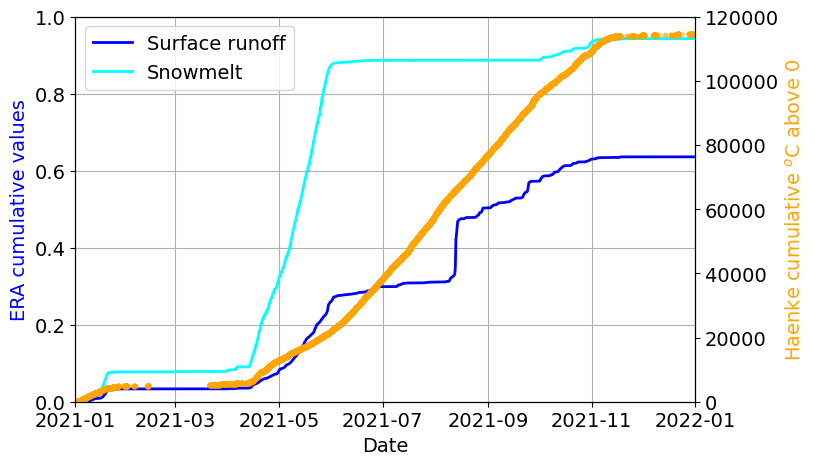

In [45]:
fs = 14
fig, ax = plt.subplots(1, figsize=(8,5))

ax.plot(dates, np.cumsum(ro), linewidth=2, color='blue')
ax.plot(dates, np.cumsum(snowmelt), linewidth=2, color='cyan')
ax.set_ylabel('ERA cumulative values', fontsize=fs, color='blue')
ax.set_xlabel('Date',fontsize=fs)
ax.tick_params(labelsize=fs)
ax.set_ylim(0,1)
ax.legend(['Surface runoff','Snowmelt'],fontsize=fs)
    
twinax = ax.twinx()
twinax.plot(year_df.AKDT, np.cumsum(year_df['Temp-AVG']), '.',color='orange', alpha=0.2)
twinax.set_ylabel('Haenke cumulative $^o$C above 0',fontsize=fs, color='orange')
twinax.tick_params(labelsize=fs)
twinax.set_ylim(0,120000)

plt.xlim(datetime.datetime(2021,1,1), datetime.datetime(2022,1,1))
ax.grid()
plt.show()

# Pull 2020 data

In [16]:
import xarray as xr

fn = basepath+'adaptor.mars.internal-1654798688.7450771-22505-17-374721ba-2db0-47b1-8d42-8ad2777f05ad.nc'
ds = xr.open_dataset(fn)
ds

<xarray.Dataset>
Dimensions:    (latitude: 11, longitude: 11, time: 8760)
Coordinates:
  * longitude  (longitude) float32 -140.0 -139.9 -139.8 ... -139.2 -139.1 -139.0
  * latitude   (latitude) float32 60.5 60.4 60.3 60.2 ... 59.8 59.7 59.6 59.5
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-12-31T23:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    asn        (time, latitude, longitude) float32 ...
    rsn        (time, latitude, longitude) float32 ...
    sd         (time, latitude, longitude) float32 ...
    sf         (time, latitude, longitude) float32 ...
    smlt       (time, latitude, longitude) float32 ...
    sro        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-06-09 18:26:13 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [17]:
ds.time

<xarray.DataArray 'time' (time: 8760)>
array(['2021-01-01T00:00:00.000000000', '2021-01-01T01:00:00.000000000',
       '2021-01-01T02:00:00.000000000', ..., '2021-12-31T21:00:00.000000000',
       '2021-12-31T22:00:00.000000000', '2021-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 ... 2021-12-31T23:00:00
Attributes:
    long_name:  time

In [11]:
# !conda install netCDF4 --y

In [13]:

# ds = nc.Dataset(fn)

In [ ]:
ds